In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.externals import joblib
from xgboost import XGBClassifier, XGBRegressor
import collections


ex_name = '13_1_mlp_4.txt'
ppl = [0.8, 0.9]# predict_proba_limits
folder_name = 'ml_threads/'
f_name = folder_name + ex_name

par = {}
parts = 10
parts4 = 100
par['pressure_time'] = {'Min': 0.0, 'Max': 100.0}
par['pressure_radius'] = {'Min': 0.0, 'Max': 5.0}
par['pressure_amplitude'] = {'Min': 0.0, 'Max': 200.0}
par['length'] = {'Min': 10.0, 'Max': 100.0}
par['diameter'] = {'Min': 0.01, 'Max': 0.5}
par['young'] = {'Min': 60.0, 'Max': 300.0}
par['density'] = {'Min': 1000.0, 'Max': 2000.0}
par['strength'] = {'Min': 0.2, 'Max': 10.0}
order_par = ['length', 'diameter', 'young', 'density', 'pressure_time', 'pressure_radius', 'pressure_amplitude', 'strength']

def get_list(Min, Max):
    return list(map(lambda x: round(x, 2), np.arange(Min, Max+0.01, (Max-Min)/(parts-1))))

def get_list4(Min, Max):
    return list(map(lambda x: round(x, 4), np.arange(Min, Max+0.01, (Max-Min)/(parts4-1))))

def get_raw(par_inxs):
    return [get_list4(**par[par_name])[par_inxs[pi]] for pi, par_name in enumerate(order_par)]

#print(get_list(**{'Min': 0, 'Max': 1}))

e0 = tuple(enumerate(get_list(**par['length'])))
e1 = tuple(enumerate(get_list(**par['diameter'])))
e2 = tuple(enumerate(get_list(**par['young'])))
e3 = tuple(enumerate(get_list(**par['density'])))
e4 = tuple(enumerate(get_list(**par['pressure_time'])))
e5 = tuple(enumerate(get_list(**par['pressure_radius'])))
e6 = tuple(enumerate(get_list(**par['pressure_amplitude'])))
e7 = tuple(enumerate(get_list(**par['strength'])))



extreme_values = [[
        par['length']['Min'],
        par['diameter']['Min'],
        par['young']['Min'],
        par['density']['Min'],
        par['pressure_time']['Min'],#get_list(**par['pressure_time'])[1],
        par['pressure_radius']['Min'],#get_list(**par['pressure_radius'])[1],
        par['pressure_amplitude']['Min'],#get_list(**par['pressure_amplitude'])[1],
        par['strength']['Min'],
        ],
        [
        par['length']['Max'],
        par['diameter']['Max'],
        par['young']['Max'],
        par['density']['Max'],
        par['pressure_time']['Max'],
        par['pressure_radius']['Max'],
        par['pressure_amplitude']['Max'],
        par['strength']['Max'],
        ]
    ]
extreme_values = np.array(extreme_values)
#x_train = (x_train - extreme_values.min(axis=0)) / (extreme_values.max(axis=0) - extreme_values.min(axis=0))


with open('../15/data3k_2.txt', 'r') as f:
    data_is_broken = f.readlines()
data_is_broken = list(map(int, data_is_broken))

y_test = []
for i, val in enumerate(data_is_broken):
    y_test.extend([i%2]*val)


new_parts = 19
def get_new_list(Min, Max):
    return list(map(lambda x: round(x, 2), np.arange(Min, Max+0.01, (Max-Min)/(new_parts-1))))[1::2]

e2_0 = tuple(enumerate(get_new_list(**par['length'])))
e2_1 = tuple(enumerate(get_new_list(**par['diameter'])))
e2_2 = tuple(enumerate(get_new_list(**par['young'])))
e2_3 = tuple(enumerate(get_new_list(**par['density'])))
e2_4 = tuple(enumerate(get_new_list(**par['pressure_time'])))
e2_5 = tuple(enumerate(get_new_list(**par['pressure_radius'])))
e2_6 = tuple(enumerate(get_new_list(**par['pressure_amplitude'])))
e2_7 = tuple(enumerate(get_new_list(**par['strength'])))

x_test = []
for i0, l in e2_0:
    for i1, di in e2_1:
        for i2, y in e2_2:
            for i3, de in e2_3:
                for i4, pt in e2_4:
                    for i5, pr in e2_5:
                        for i6, pa in e2_6:
                            for i7, s in e2_7:
                                #if 0 not in [i4, i5, i6]:
                                #print(l, di, y, de, pt, pr, pa, s)
                                x_test.append([l, di, y, de, pt, pr, pa, s])
    print(i0)
x_test, y_test = np.array(x_test), np.array(y_test)

x_test = (x_test - extreme_values.min(axis=0)) / (extreme_values.max(axis=0) - extreme_values.min(axis=0))


def make_str(data):
    return ''.join(map(str, data))
def make_set(data):
    return {make_str(i) for i in data}

with open(f_name, 'r') as f:
    threads = f.readlines()

roc_metrics, pr_metrics, f1_metrics = [], [], []
roc_metric, pr_metric, f1_metric = [], [], []


0
1
2
3
4
5
6
7
8


In [2]:
cut = 500
print('\n\n\n', '#'*10, cut, '#'*10)

x_train, y_train = [], []
for t in threads[:cut]:
    tr = list(map(int, t.replace('\n', '').split(',')))
    x_train.append(tr[:-1])
    y_train.append(tr[-1])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.array(list(map(get_raw, x_train)))
x_train = (x_train - extreme_values.min(axis=0)) / (extreme_values.max(axis=0) - extreme_values.min(axis=0))
model = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(70, 70, 70), max_iter=100000, random_state=42)
print('\n', '-'*10, model.__class__.__name__, '-'*10)
print(x_test.shape, y_test.shape)
print('y_test', dict(collections.Counter(y_test)), 'y_train', dict(collections.Counter(y_train)))
# fit model on training data
model.fit(x_train, y_train)




 ########## 500 ##########

 ---------- MLPClassifier ----------
(43046721, 8) (43046721,)
y_test {1: 33300144, 0: 9746577} y_train {1: 215, 0: 285}


MLPClassifier(activation='tanh', hidden_layer_sizes=(70, 70, 70),
              max_iter=100000, random_state=42)

In [3]:
y_pred = model.predict(x_test[:10000000])
y_pred = np.concatenate((y_pred, model.predict(x_test[10000000:20000000])))
y_pred = np.concatenate((y_pred, model.predict(x_test[20000000:30000000])))
y_pred = np.concatenate((y_pred, model.predict(x_test[30000000:40000000])))
y_pred = np.concatenate((y_pred, model.predict(x_test[40000000:])))


y_pred_proba = model.predict_proba(x_test[:10000000])
y_pred_proba = np.concatenate((y_pred_proba, model.predict_proba(x_test[10000000:20000000])))
y_pred_proba = np.concatenate((y_pred_proba, model.predict_proba(x_test[20000000:30000000])))
y_pred_proba = np.concatenate((y_pred_proba, model.predict_proba(x_test[30000000:40000000])))
y_pred_proba = np.concatenate((y_pred_proba, model.predict_proba(x_test[40000000:])))
y_pred_proba = y_pred_proba[:, 0]

In [4]:
y_tail = y_pred_proba[y_test != y_pred]

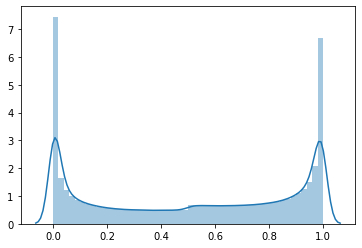

In [5]:
sns.distplot(y_tail)

In [6]:
import pandas as pd

In [7]:
y_series = pd.Series(y_tail)
y_series.describe()

count    2.329085e+06
mean     5.169188e-01
std      3.762168e-01
min      2.548642e-09
25%      1.080329e-01
50%      5.577387e-01
75%      9.022744e-01
max      1.000000e+00
dtype: float64

count    4.071764e+07
mean     2.153574e-01
std      3.976988e-01
min      2.220446e-16
25%      5.455095e-10
50%      6.876987e-07
75%      5.256170e-02
max      1.000000e+00
dtype: float64

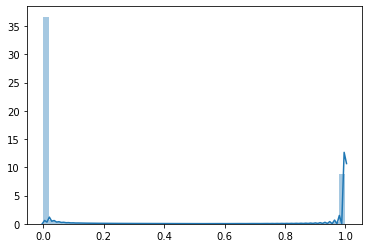

In [8]:
y_main = y_pred_proba[y_test == y_pred]
sns.distplot(y_main)
y_main_series = pd.Series(y_main)
y_main_series.describe()

count    1.254025e+06
mean     8.337303e-01
std      1.570273e-01
min      5.000000e-01
25%      7.053563e-01
50%      8.830484e-01
75%      9.796812e-01
max      1.000000e+00
dtype: float64

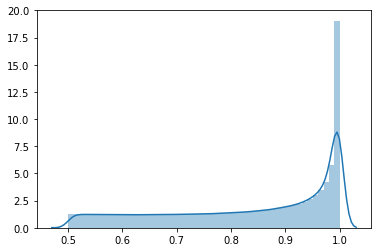

In [9]:
y_main = y_pred_proba[(y_test == 1) & (y_test != y_pred)]
sns.distplot(y_main)
y_main_series = pd.Series(y_main)
y_main_series.describe()

count    1.075060e+06
mean     1.473677e-01
std      1.556656e-01
min      2.548642e-09
25%      7.708519e-03
50%      8.499033e-02
75%      2.659712e-01
max      4.999981e-01
dtype: float64

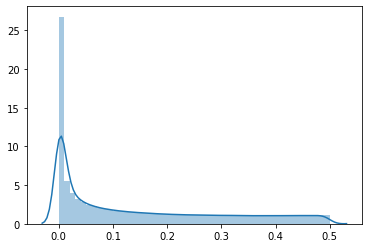

In [10]:
y_main = y_pred_proba[(y_test == 0) & (y_test != y_pred)]
sns.distplot(y_main)
y_main_series = pd.Series(y_main)
y_main_series.describe()

count    1.075060e+06
mean     2.929038e+01
std      3.147532e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+01
75%      5.000000e+01
max      1.000000e+02
dtype: float64

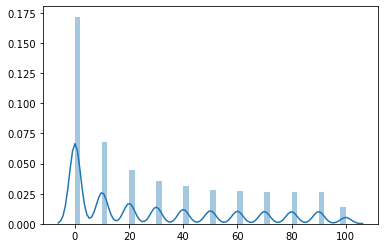

In [11]:
y_main = np.round(y_pred_proba[(y_test == 0) & (y_test != y_pred)]*2, 1)*100
sns.distplot(y_main)
y_main_series = pd.Series(y_main)
y_main_series.describe()

In [12]:
y_tail2 = y_pred_proba[y_test == y_pred]

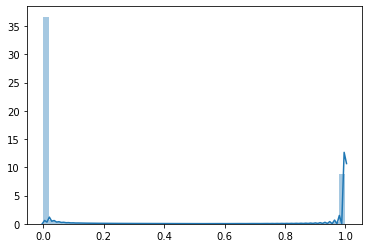

In [13]:
sns.distplot(y_tail2)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model_lg = MLPClassifier(random_state=42)
model_lg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [16]:
y_pred_lg = model_lg.predict(x_test[:10000000])
y_pred_lg = np.concatenate((y_pred_lg, model_lg.predict(x_test[10000000:20000000])))
y_pred_lg = np.concatenate((y_pred_lg, model_lg.predict(x_test[20000000:30000000])))
y_pred_lg = np.concatenate((y_pred_lg, model_lg.predict(x_test[30000000:40000000])))
y_pred_lg = np.concatenate((y_pred_lg, model_lg.predict(x_test[40000000:])))


y_pred_proba_lg = model_lg.predict_proba(x_test[:10000000])
y_pred_proba_lg = np.concatenate((y_pred_proba_lg, model_lg.predict_proba(x_test[10000000:20000000])))
y_pred_proba_lg = np.concatenate((y_pred_proba_lg, model_lg.predict_proba(x_test[20000000:30000000])))
y_pred_proba_lg = np.concatenate((y_pred_proba_lg, model_lg.predict_proba(x_test[30000000:40000000])))
y_pred_proba_lg = np.concatenate((y_pred_proba_lg, model_lg.predict_proba(x_test[40000000:])))
y_pred_proba_lg = y_pred_proba_lg[:, 0]

In [17]:
y_tail_lg = y_pred_proba_lg[y_test != y_pred_lg]

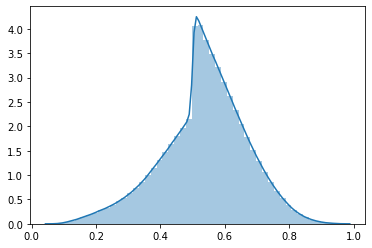

In [18]:
sns.distplot(y_tail_lg)

count    1.351206e+06
mean     7.839089e+01
std      1.772752e+01
min      1.000000e+01
25%      7.000000e+01
50%      8.000000e+01
75%      9.000000e+01
max      1.000000e+02
dtype: float64

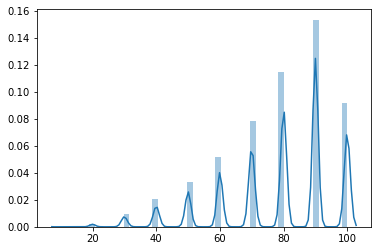

In [19]:
y_main_lg = np.round(y_pred_proba_lg[(y_test == 0) & (y_test != y_pred_lg)]*2, 1)*100
sns.distplot(y_main_lg)
y_main_series_lg = pd.Series(y_main_lg)
y_main_series_lg.describe()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score, f1_score

In [21]:
f1 = f1_score(y_test, y_pred, average=None)
round(float(f1[0]), 4)

0.8816

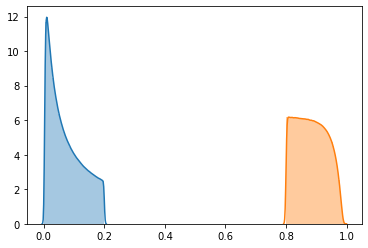

In [22]:
sns.distplot(y_pred_proba_lg[y_pred_proba_lg < 0.2])
sns.distplot(y_pred_proba_lg[y_pred_proba_lg > 0.8])

In [23]:
f1_lg = f1_score(y_test, y_pred_lg, average=None)
round(float(f1_lg[0]), 4)

0.8009

In [24]:
x_train_lg = np.concatenate((x_train, x_test[y_pred_proba_lg < 0.2], x_test[y_pred_proba_lg > 0.8]))
y_train_lg = np.concatenate((y_train, y_pred_lg[y_pred_proba_lg < 0.2], y_pred_lg[y_pred_proba_lg > 0.8]))

In [25]:
model_mlp = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(70, 70, 70), max_iter=100000, random_state=42)
print('\n', '-'*10, model_mlp.__class__.__name__, '-'*10)
print(x_test.shape, y_test.shape)
print('y_test', dict(collections.Counter(y_test)), 'y_train', dict(collections.Counter(y_train_lg)))
# fit model on training data
model_mlp.fit(x_train_lg, y_train_lg)


 ---------- MLPClassifier ----------
(43046721, 8) (43046721,)
y_test {1: 33300144, 0: 9746577} y_train {1: 20888201, 0: 3718345}


MLPClassifier(activation='tanh', hidden_layer_sizes=(70, 70, 70),
              max_iter=100000, random_state=42)

In [26]:
y_pred_mlp = model_mlp.predict(x_test[:10000000])
y_pred_mlp = np.concatenate((y_pred_mlp, model_mlp.predict(x_test[10000000:20000000])))
y_pred_mlp = np.concatenate((y_pred_mlp, model_mlp.predict(x_test[20000000:30000000])))
y_pred_mlp = np.concatenate((y_pred_mlp, model_mlp.predict(x_test[30000000:40000000])))
y_pred_mlp = np.concatenate((y_pred_mlp, model_mlp.predict(x_test[40000000:])))


y_pred_proba_mlp = model_mlp.predict_proba(x_test[:10000000])
y_pred_proba_mlp = np.concatenate((y_pred_proba_mlp, model_mlp.predict_proba(x_test[10000000:20000000])))
y_pred_proba_mlp = np.concatenate((y_pred_proba_mlp, model_mlp.predict_proba(x_test[20000000:30000000])))
y_pred_proba_mlp = np.concatenate((y_pred_proba_mlp, model_mlp.predict_proba(x_test[30000000:40000000])))
y_pred_proba_mlp = np.concatenate((y_pred_proba_mlp, model_mlp.predict_proba(x_test[40000000:])))
y_pred_proba_mlp = y_pred_proba_mlp[:, 0]

In [27]:
f1_mlp = f1_score(y_test, y_pred_mlp, average=None)
round(float(f1_mlp[0]), 4)

0.7755

In [28]:
x_train_lg_2 = np.concatenate((x_train, x_test[y_pred_proba_lg < 0.1], x_test[y_pred_proba_lg > 0.9]))
y_train_lg_2 = np.concatenate((y_train, y_pred_lg[y_pred_proba_lg < 0.1], y_pred_lg[y_pred_proba_lg > 0.9]))

In [29]:
model_mlp_2 = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(70, 70, 70), max_iter=100000, random_state=42)
print('\n', '-'*10, model_mlp.__class__.__name__, '-'*10)
print(x_test.shape, y_test.shape)
print('y_test', dict(collections.Counter(y_test)), 'y_train', dict(collections.Counter(y_train_lg_2)))
# fit model on training data
model_mlp_2.fit(x_train_lg_2, y_train_lg_2)


 ---------- MLPClassifier ----------
(43046721, 8) (43046721,)
y_test {1: 33300144, 0: 9746577} y_train {1: 14419045, 0: 1457116}


MLPClassifier(activation='tanh', hidden_layer_sizes=(70, 70, 70),
              max_iter=100000, random_state=42)

In [30]:
y_pred_mlp_2 = model_mlp_2.predict(x_test[:10000000])
y_pred_mlp_2 = np.concatenate((y_pred_mlp_2, model_mlp_2.predict(x_test[10000000:20000000])))
y_pred_mlp_2 = np.concatenate((y_pred_mlp_2, model_mlp_2.predict(x_test[20000000:30000000])))
y_pred_mlp_2 = np.concatenate((y_pred_mlp_2, model_mlp_2.predict(x_test[30000000:40000000])))
y_pred_mlp_2 = np.concatenate((y_pred_mlp_2, model_mlp_2.predict(x_test[40000000:])))


y_pred_proba_mlp_2 = model_mlp_2.predict_proba(x_test[:10000000])
y_pred_proba_mlp_2 = np.concatenate((y_pred_proba_mlp_2, model_mlp_2.predict_proba(x_test[10000000:20000000])))
y_pred_proba_mlp_2 = np.concatenate((y_pred_proba_mlp_2, model_mlp_2.predict_proba(x_test[20000000:30000000])))
y_pred_proba_mlp_2 = np.concatenate((y_pred_proba_mlp_2, model_mlp_2.predict_proba(x_test[30000000:40000000])))
y_pred_proba_mlp_2 = np.concatenate((y_pred_proba_mlp_2, model_mlp_2.predict_proba(x_test[40000000:])))
y_pred_proba_mlp_2 = y_pred_proba_mlp_2[:, 0]

In [31]:
f1_mlp_2 = f1_score(y_test, y_pred_mlp_2, average=None)
round(float(f1_mlp_2[0]), 4)

0.779

In [32]:
x_train_lg_3 = np.concatenate((x_train, x_test[y_pred_proba_lg > 0.95]))
y_train_lg_3 = np.concatenate((y_train, y_pred_lg[y_pred_proba_lg > 0.95]))

In [33]:
model_mlp_3 = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(70, 70, 70), max_iter=100000, random_state=42)
print('\n', '-'*10, model_mlp.__class__.__name__, '-'*10)
print(x_test.shape, y_test.shape)
print('y_test', dict(collections.Counter(y_test)), 'y_train', dict(collections.Counter(y_train_lg_3)))
# fit model on training data
model_mlp_3.fit(x_train_lg_3, y_train_lg_3)


 ---------- MLPClassifier ----------
(43046721, 8) (43046721,)
y_test {1: 33300144, 0: 9746577} y_train {1: 215, 0: 432856}


MLPClassifier(activation='tanh', hidden_layer_sizes=(70, 70, 70),
              max_iter=100000, random_state=42)

In [34]:
y_pred_mlp_3 = model_mlp_3.predict(x_test[:10000000])
y_pred_mlp_3 = np.concatenate((y_pred_mlp_3, model_mlp_3.predict(x_test[10000000:20000000])))
y_pred_mlp_3 = np.concatenate((y_pred_mlp_3, model_mlp_3.predict(x_test[20000000:30000000])))
y_pred_mlp_3 = np.concatenate((y_pred_mlp_3, model_mlp_3.predict(x_test[30000000:40000000])))
y_pred_mlp_3 = np.concatenate((y_pred_mlp_3, model_mlp_3.predict(x_test[40000000:])))


y_pred_proba_mlp_3 = model_mlp_3.predict_proba(x_test[:10000000])
y_pred_proba_mlp_3 = np.concatenate((y_pred_proba_mlp_3, model_mlp_3.predict_proba(x_test[10000000:20000000])))
y_pred_proba_mlp_3 = np.concatenate((y_pred_proba_mlp_3, model_mlp_3.predict_proba(x_test[20000000:30000000])))
y_pred_proba_mlp_3 = np.concatenate((y_pred_proba_mlp_3, model_mlp_3.predict_proba(x_test[30000000:40000000])))
y_pred_proba_mlp_3 = np.concatenate((y_pred_proba_mlp_3, model_mlp_3.predict_proba(x_test[40000000:])))
y_pred_proba_mlp_3 = y_pred_proba_mlp_3[:, 0]

In [35]:
f1_mlp_3 = f1_score(y_test, y_pred_mlp_3, average=None)
round(float(f1_mlp_3[0]), 4)

0.7155

In [36]:
y_pred_proba_lg1 = model_lg.predict_proba(x_test[:10000000])
y_pred_proba_lg1 = np.concatenate((y_pred_proba_lg1, model_lg.predict_proba(x_test[10000000:20000000])))
y_pred_proba_lg1 = np.concatenate((y_pred_proba_lg1, model_lg.predict_proba(x_test[20000000:30000000])))
y_pred_proba_lg1 = np.concatenate((y_pred_proba_lg1, model_lg.predict_proba(x_test[30000000:40000000])))
y_pred_proba_lg1 = np.concatenate((y_pred_proba_lg1, model_lg.predict_proba(x_test[40000000:])))
y_pred_proba_lg1 = y_pred_proba_lg1[:, 1]

In [37]:
x_train_lg_4 = np.concatenate((x_train, x_test[y_pred_proba_lg1 < 0.05]))
y_train_lg_4 = np.concatenate((y_train, y_pred_lg[y_pred_proba_lg1 < 0.05]))

In [38]:
model_mlp_4 = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=(70, 70, 70), max_iter=100000, random_state=42)
print('\n', '-'*10, model_mlp.__class__.__name__, '-'*10)
print(x_test.shape, y_test.shape)
print('y_test', dict(collections.Counter(y_test)), 'y_train', dict(collections.Counter(y_train_lg_4)))
# fit model on training data
model_mlp_4.fit(x_train_lg_4, y_train_lg_4)


 ---------- MLPClassifier ----------
(43046721, 8) (43046721,)
y_test {1: 33300144, 0: 9746577} y_train {1: 215, 0: 432856}


MLPClassifier(activation='tanh', hidden_layer_sizes=(70, 70, 70),
              max_iter=100000, random_state=42)

In [39]:
y_pred_mlp_4 = model_mlp_4.predict(x_test[:10000000])
y_pred_mlp_4 = np.concatenate((y_pred_mlp_4, model_mlp_4.predict(x_test[10000000:20000000])))
y_pred_mlp_4 = np.concatenate((y_pred_mlp_4, model_mlp_4.predict(x_test[20000000:30000000])))
y_pred_mlp_4 = np.concatenate((y_pred_mlp_4, model_mlp_4.predict(x_test[30000000:40000000])))
y_pred_mlp_4 = np.concatenate((y_pred_mlp_4, model_mlp_4.predict(x_test[40000000:])))

In [40]:
f1_mlp_4 = f1_score(y_test, y_pred_mlp_4, average=None)
round(float(f1_mlp_4[0]), 4)

0.7155